In [30]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15,12) # w, h
from bounding_box import bounding_box as bb
from PIL import Image


def visualize_bbox(img_path, predicted_boxes, ground_truth_boxes=None, threshold=0.0, save_image=False, plot_img=True):
    """
    predicted_boxes: left, top, right, bottom
    ground_truth_boxes: left, top, right, bottom
    """
    image = cv2.imread(img_path)
    for pred_box in predicted_boxes: 
        bb.add(image, *pred_box[:-1],  'yayacik|' +str(pred_box[-1])[:4], 'green')

    if ground_truth_boxes is not None:
        for gt_box in ground_truth_boxes: 
            bb.add(image, *gt_box[:-1],  'yayacik|', color='maroon')
    
    return image

In [41]:
bboxes = np.array([[1.21537361e+02, 4.85048798e+02, 1.48613190e+02, 5.23303162e+02,
        2.52135456e-01],
       [1.12694855e+02, 4.91337341e+02, 1.38322968e+02, 5.25042603e+02,
        1.01460010e-01],
       [2.34018204e+02, 2.56781097e+02, 2.55687958e+02, 2.90683014e+02,
        7.75477514e-02]])

g_bboxes = np.array([[1.31537361e+02, 4.85048798e+02, 1.48613190e+02, 5.23303162e+02,
        2.22135456e-01],
       [1.22694855e+02, 4.91337341e+02, 1.38322968e+02, 5.25042603e+02,
        1.51460010e-01],
       [2.34018204e+02, 2.56781097e+02, 2.55687958e+02, 2.90683014e+02,
        7.25477514e-02]])

In [42]:
img_result = visualize_bbox('../../data/ktr-test/test/B23072019_V1_K1/frame2009.jpg',
              bboxes, g_bboxes)


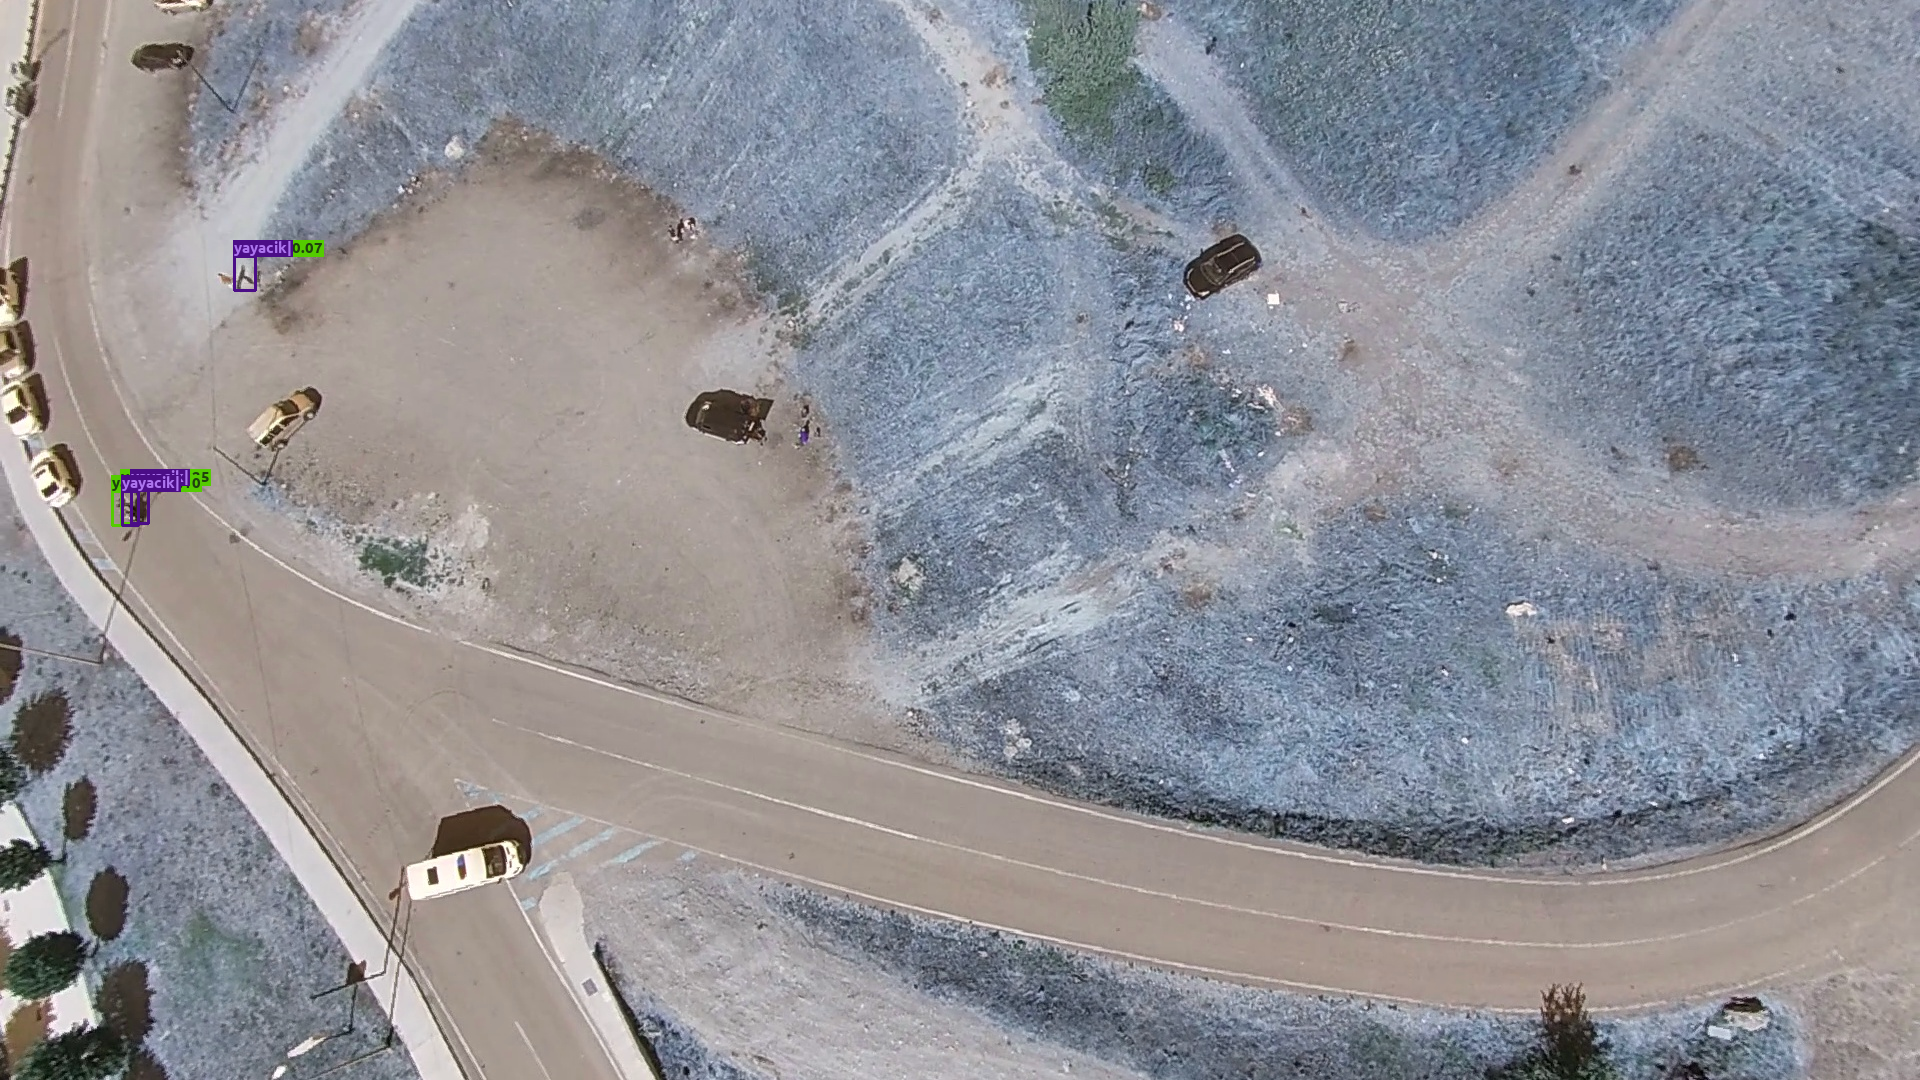

In [33]:
Image.fromarray(img_result)

In [107]:
import cv2
from PIL import Image
import matplotlib.patches as patches


color_val = {
    'red': (0, 0, 255),
    'green': (0, 255, 0),
    'blue': (255, 0, 0),
    'cyan': (255, 255, 0),
    'yellow': (0, 255, 255),
    'magenta': (255, 0, 255),
    'white': (255, 255, 255),
    'black': (0, 0, 0),
}


def imshow_det_bboxes(img,
                      bboxes,
                      labels,
                      gt_bboxes,
                      class_names=None,
                      score_thr=0,
                      bbox_color='green',
                      text_color='green',
                      thickness=1,
                      font_scale=0.5,
                      show=True,
                      win_name='',
                      wait_time=0,
                      out_file=None):
    """Draw bboxes and class labels (with scores) on an image.
    Args:
        img (str or ndarray): The image to be displayed.
        bboxes (ndarray): Bounding boxes (with scores), shaped (n, 4) or
            (n, 5).
        labels (ndarray): Labels of bboxes.
        class_names (list[str]): Names of each classes.
        score_thr (float): Minimum score of bboxes to be shown.
        bbox_color (str or tuple or :obj:`Color`): Color of bbox lines.
        text_color (str or tuple or :obj:`Color`): Color of texts.
        thickness (int): Thickness of lines.
        font_scale (float): Font scales of texts.
        show (bool): Whether to show the image.
        win_name (str): The window name.
        wait_time (int): Value of waitKey param.
        out_file (str or None): The filename to write the image.
    """
    assert bboxes.ndim == 2
    assert labels.ndim == 1
    assert bboxes.shape[0] == labels.shape[0]
    assert bboxes.shape[1] == 4 or bboxes.shape[1] == 5
    img = cv2.imread(img)

    if score_thr > 0:
        assert bboxes.shape[1] == 5
        scores = bboxes[:, -1]
        inds = scores > score_thr
        bboxes = bboxes[inds, :]
        labels = labels[inds]

    bbox_color = color_val[bbox_color]
    text_color = color_val[text_color]

    for bbox, label in zip(bboxes, labels):
        bbox_int = bbox.astype(np.int32)
        left_top = (bbox_int[0], bbox_int[1])
        right_bottom = (bbox_int[2], bbox_int[3])
        cv2.rectangle(
            img, left_top, right_bottom, bbox_color, thickness=thickness)
        label_text = class_names[
            label] if class_names is not None else 'cls {}'.format(label)
        if len(bbox) > 4:
            label_text += '|{:.02f}'.format(bbox[-1])
        cv2.putText(img, label_text, (bbox_int[0], bbox_int[1] - 2),
                    cv2.FONT_HERSHEY_COMPLEX, font_scale, text_color)

        
    fig, ax = plt.subplots(1)
    ax.imshow(img);

    for bbox, label in zip(gt_bboxes, labels):
        
        x1, y1, x2, y2 = bbox[:-1]
        p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1,
                                    alpha=0.7, linestyle="dashed",
                                    edgecolor='red', facecolor='none')
        ax.add_patch(p)
    fig.savefig("%temp.png", bbox_inches='tight', pad_inches=0);
    
    if show:
        return Image.open("%temp.png")
    if out_file is not None:
        imwrite(img, out_file)

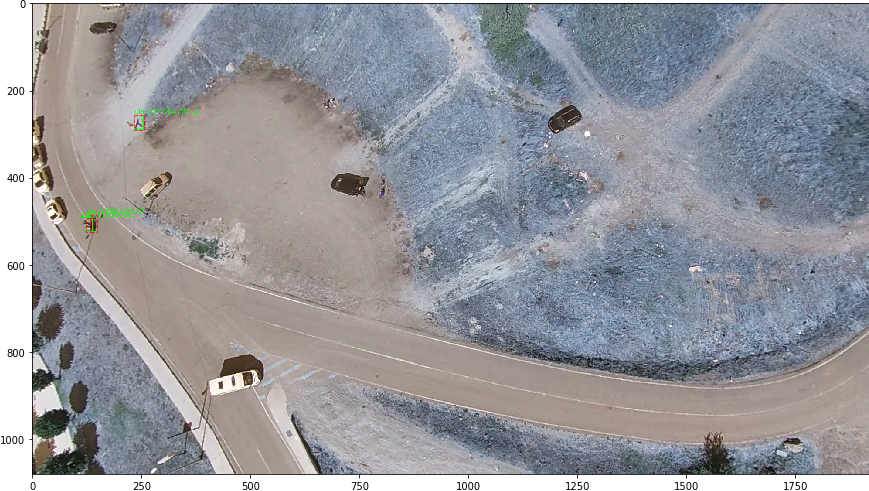

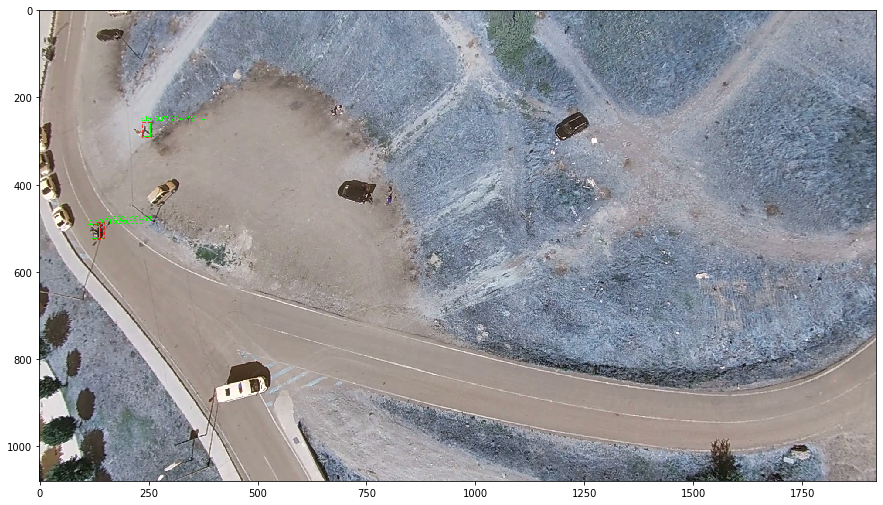

In [108]:
imshow_det_bboxes('../../data/ktr-test/test/B23072019_V1_K1/frame2009.jpg',
              bboxes[:,:-1], bboxes[:,-1], g_bboxes)

In [ ]:
gt_

In [51]:
display_differences('../../data/ktr-test/test/B23072019_V1_K1/frame2009.jpg',
                   g_bboxes[:,:-1], 0, None, bboxes[:,:-1], 0, bboxes[:, -1], None, ['yaya'], show_mask=False, iou_threshold=0.005, score_threshold=0.005)

TypeError: 'NoneType' object is not subscriptable

In [50]:
def display_differences(image,
                        gt_box, gt_class_id, gt_mask,
                        pred_box, pred_class_id, pred_score, pred_mask,
                        class_names, title="", ax=None,
                        show_mask=True, show_box=True,
                        iou_threshold=0.5, score_threshold=0.5):
    """Display ground truth and prediction instances on the same image."""
    # Match predictions to ground truth
    gt_match, pred_match, overlaps = compute_matches(
        gt_box, gt_class_id, gt_mask,
        pred_box, pred_class_id, pred_score, pred_mask,
        iou_threshold=iou_threshold, score_threshold=score_threshold)
    # Ground truth = green. Predictions = red
    colors = [(0, 1, 0, .8)] * len(gt_match)\
           + [(1, 0, 0, 1)] * len(pred_match)
    # Concatenate GT and predictions
    class_ids = np.concatenate([gt_class_id, pred_class_id])
    scores = np.concatenate([np.zeros([len(gt_match)]), pred_score])
    boxes = np.concatenate([gt_box, pred_box])
    masks = np.concatenate([gt_mask, pred_mask], axis=-1)
    # Captions per instance show score/IoU
    captions = ["" for m in gt_match] + ["{:.2f} / {:.2f}".format(
        pred_score[i],
        (overlaps[i, int(pred_match[i])]
            if pred_match[i] > -1 else overlaps[i].max()))
            for i in range(len(pred_match))]
    # Set title if not provided
    title = title or "Ground Truth and Detections\n GT=green, pred=red, captions: score/IoU"
    # Display
    display_instances(
        image,
        boxes, masks, class_ids,
        class_names, scores, ax=ax,
        show_bbox=show_box, show_mask=show_mask,
        colors=colors, captions=captions,
        title=title)

In [36]:
def display_instances(image, boxes, masks, class_ids, class_names,
                      scores=None, title="",
                      figsize=(16, 16), ax=None,
                      show_mask=True, show_bbox=True,
                      colors=None, captions=None):
    """
    boxes: [num_instance, (y1, x1, y2, x2, class_id)] in image coordinates.
    masks: [height, width, num_instances]
    class_ids: [num_instances]
    class_names: list of class names of the dataset
    scores: (optional) confidence scores for each box
    title: (optional) Figure title
    show_mask, show_bbox: To show masks and bounding boxes or not
    figsize: (optional) the size of the image
    colors: (optional) An array or colors to use with each object
    captions: (optional) A list of strings to use as captions for each object
    """
    # Number of instances
    N = boxes.shape[0]
    if not N:
        print("\n*** No instances to display *** \n")
    else:
        assert boxes.shape[0] == masks.shape[-1] == class_ids.shape[0]

    # If no axis is passed, create one and automatically call show()
    auto_show = False
    if not ax:
        _, ax = plt.subplots(1, figsize=figsize)
        auto_show = True

    # Generate random colors
    colors = colors or random_colors(N)

    # Show area outside image boundaries.
    height, width = image.shape[:2]
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')
    ax.set_title(title)

    masked_image = image.astype(np.uint32).copy()
    for i in range(N):
        color = colors[i]

        # Bounding box
        if not np.any(boxes[i]):
            # Skip this instance. Has no bbox. Likely lost in image cropping.
            continue
        y1, x1, y2, x2 = boxes[i]
        if show_bbox:
            p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
                                alpha=0.7, linestyle="dashed",
                                edgecolor=color, facecolor='none')
            ax.add_patch(p)

        # Label
        if not captions:
            class_id = class_ids[i]
            score = scores[i] if scores is not None else None
            label = class_names[class_id]
            caption = "{} {:.3f}".format(label, score) if score else label
        else:
            caption = captions[i]
        ax.text(x1, y1 + 8, caption,
                color='w', size=11, backgroundcolor="none")

        # Mask
        mask = masks[:, :, i]
        if show_mask:
            masked_image = apply_mask(masked_image, mask, color)

        # Mask Polygon
        # Pad to ensure proper polygons for masks that touch image edges.
        padded_mask = np.zeros(
            (mask.shape[0] + 2, mask.shape[1] + 2), dtype=np.uint8)
        padded_mask[1:-1, 1:-1] = mask
        contours = find_contours(padded_mask, 0.5)
        for verts in contours:
            # Subtract the padding and flip (y, x) to (x, y)
            verts = np.fliplr(verts) - 1
            p = Polygon(verts, facecolor="none", edgecolor=color)
            ax.add_patch(p)
    ax.imshow(masked_image.astype(np.uint8))
    if auto_show:
        plt.show()

In [49]:
def compute_matches(gt_boxes, gt_class_ids, gt_masks,
                    pred_boxes, pred_class_ids, pred_scores, pred_masks,
                    iou_threshold=0.5, score_threshold=0.0):
    """Finds matches between prediction and ground truth instances.
    Returns:
        gt_match: 1-D array. For each GT box it has the index of the matched
                  predicted box.
        pred_match: 1-D array. For each predicted box, it has the index of
                    the matched ground truth box.
        overlaps: [pred_boxes, gt_boxes] IoU overlaps.
    """
    # Trim zero padding
    # TODO: cleaner to do zero unpadding upstream
    gt_boxes = trim_zeros(gt_boxes)
    gt_masks = gt_masks[..., :gt_boxes.shape[0]]
    pred_boxes = trim_zeros(pred_boxes)
    pred_scores = pred_scores[:pred_boxes.shape[0]]
    # Sort predictions by score from high to low
    indices = np.argsort(pred_scores)[::-1]
    pred_boxes = pred_boxes[indices]
    pred_class_ids = pred_class_ids[indices]
    pred_scores = pred_scores[indices]
    pred_masks = pred_masks[..., indices]

    # Compute IoU overlaps [pred_masks, gt_masks]
    overlaps = compute_overlaps_masks(pred_masks, gt_masks)

    # Loop through predictions and find matching ground truth boxes
    match_count = 0
    pred_match = -1 * np.ones([pred_boxes.shape[0]])
    gt_match = -1 * np.ones([gt_boxes.shape[0]])
    for i in range(len(pred_boxes)):
        # Find best matching ground truth box
        # 1. Sort matches by score
        sorted_ixs = np.argsort(overlaps[i])[::-1]
        # 2. Remove low scores
        low_score_idx = np.where(overlaps[i, sorted_ixs] < score_threshold)[0]
        if low_score_idx.size > 0:
            sorted_ixs = sorted_ixs[:low_score_idx[0]]
        # 3. Find the match
        for j in sorted_ixs:
            # If ground truth box is already matched, go to next one
            if gt_match[j] > -1:
                continue
            # If we reach IoU smaller than the threshold, end the loop
            iou = overlaps[i, j]
            if iou < iou_threshold:
                break
            # Do we have a match?
            if pred_class_ids[i] == gt_class_ids[j]:
                match_count += 1
                gt_match[j] = i
                pred_match[i] = j
                break

    return gt_match, pred_match, overlaps


In [48]:
def trim_zeros(x):
    """It's common to have tensors larger than the available data and
    pad with zeros. This function removes rows that are all zeros.
    x: [rows, columns].
    """
    assert len(x.shape) == 2
    return x[~np.all(x == 0, axis=1)]